In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
%matplotlib inline

In [6]:
data_glass=pd.read_csv('glass.csv')
print(data_glass.head())
print(data_glass.shape)
print(data_glass.columns)
print(data_glass.describe())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
(214, 10)
Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516523   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000

In [ ]:
#Всего 10 столбцов, 214 строк. 

In [14]:
#Показатель преломления стекла
# RI: refractive index

#Элементы, которые входят в состав
# Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
# Mg: Magnesium
# Al: Aluminum
# Si: Silicon
# K: Potassium
# Ca: Calcium
# Ba: Barium
# Fe: Iron

#Тип стекла
# Type of glass: (class attribute) -- 1 building_windows_float_processed -- 
#2 building_windows_non_float_processed -- 
#3 vehicle_windows_float_processed -- 
#4 vehicle_windows_non_float_processed (none in this database) -- 
#5 containers -- 
#6 tableware -- 
#7 headlamps

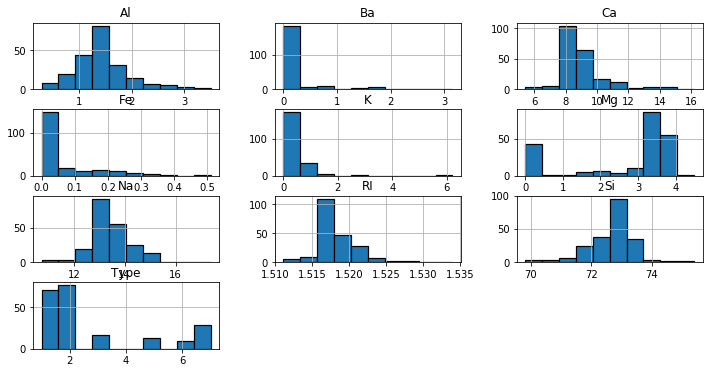

In [8]:
data_glass.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

In [9]:
#Визуально нормальное распределение имеют AI, NA, PI, SI.
# Распределение элементов BA, CA, FE, K, MG не похоже на нормальное. BA, FE, K похоже на логнормальное.
# Но это скорее всего из-за того, что датасет маленького размера.
# Возможно если датасет будет в несколько раз больше, то распределения по этим элементам буду стремиться к нормальным.
# По переменной Type визуально нельзя оценить, какое это распределение. 
# Но учитывая, что это переменная с классами, то скорее всего на больших данных распределение тоже будет нормальным.
# На этих данныех к примеру нет 4 класса.

In [11]:
data_glass.isnull().sum().sort_values(ascending = False)

Type    0
Fe      0
Ba      0
Ca      0
K       0
Si      0
Al      0
Mg      0
Na      0
RI      0
dtype: int64

In [12]:
#пустых ячеек нет

In [17]:
#Взаимодействие значений с разбивкой на классы

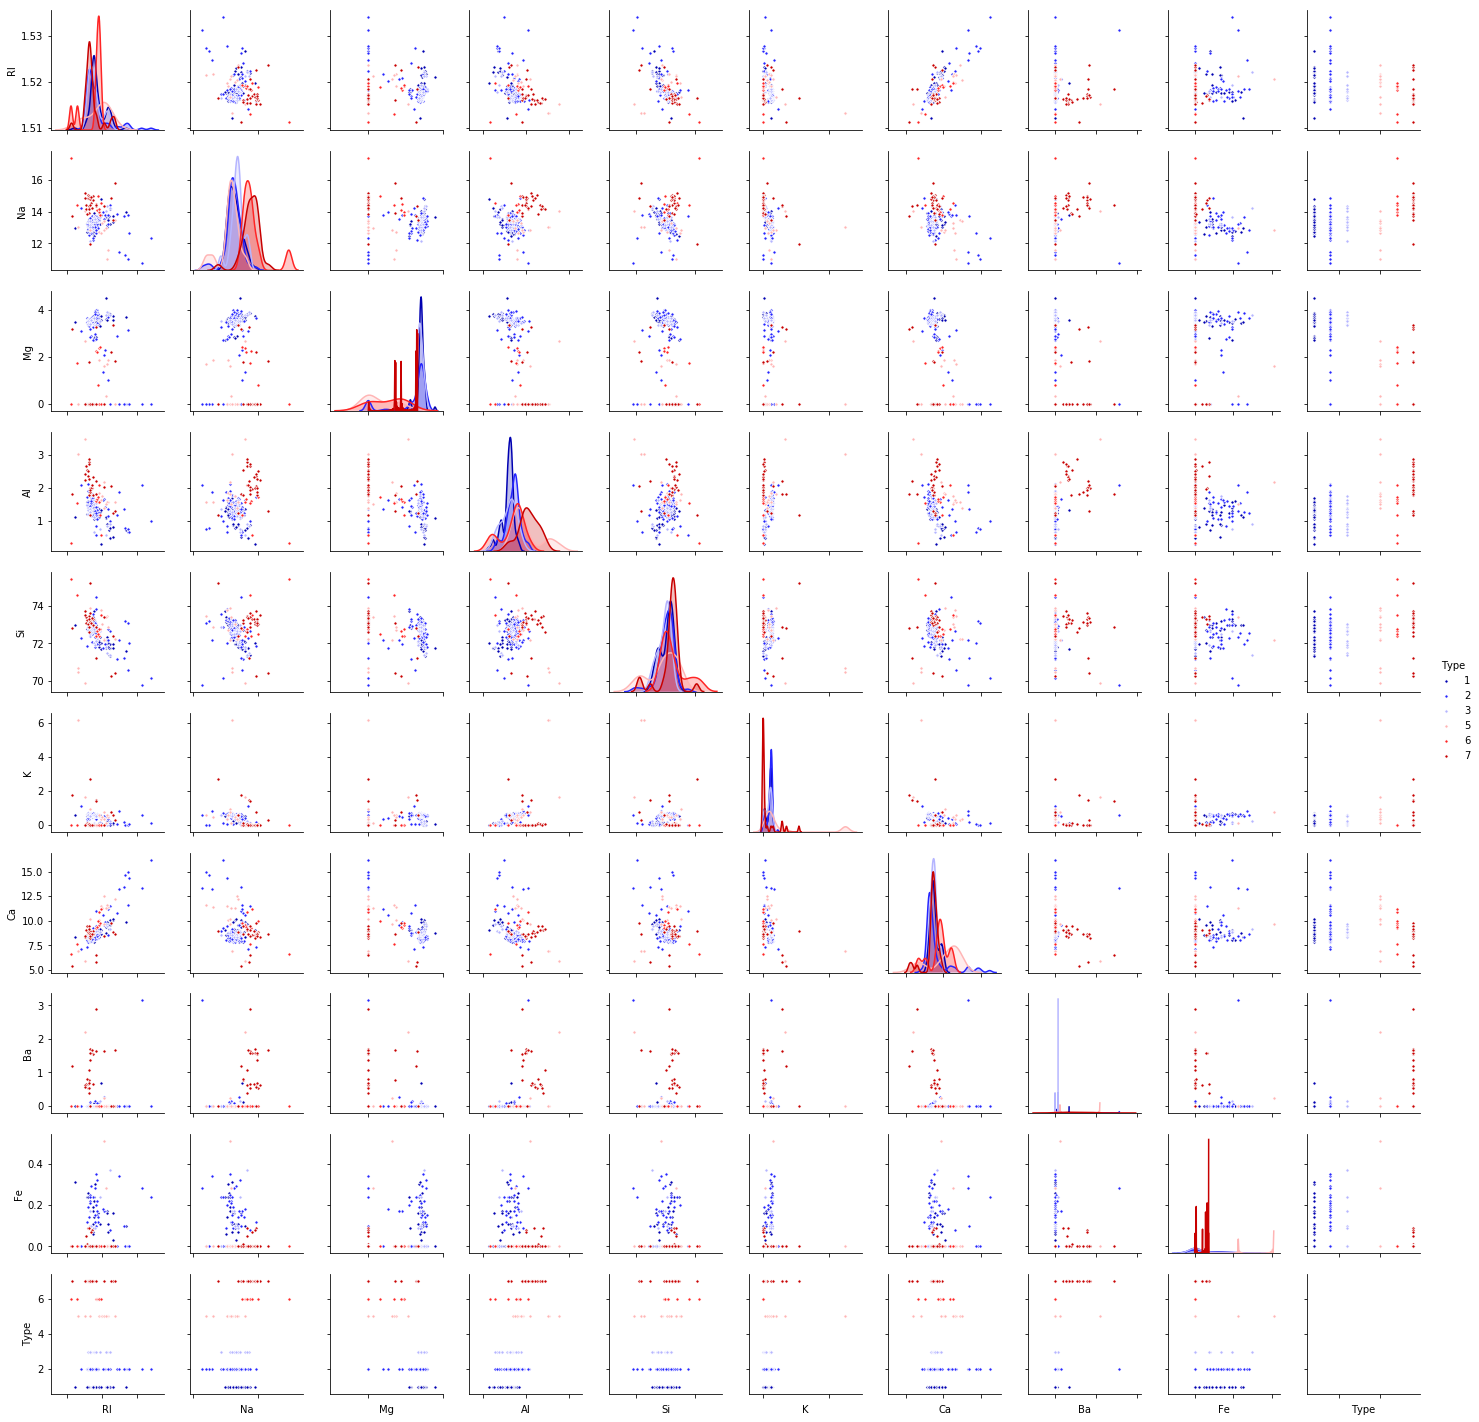

In [41]:
g = sns.pairplot(data=data_glass, hue='Type', palette = 'seismic',
                 height=2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

In [42]:
#Можно увидеть корелляцию между Ri (преломление) и Si, а также Ri и  Ca. 
#Какой-то видимой зависимости между элементами в составе стекла не наблюдается.

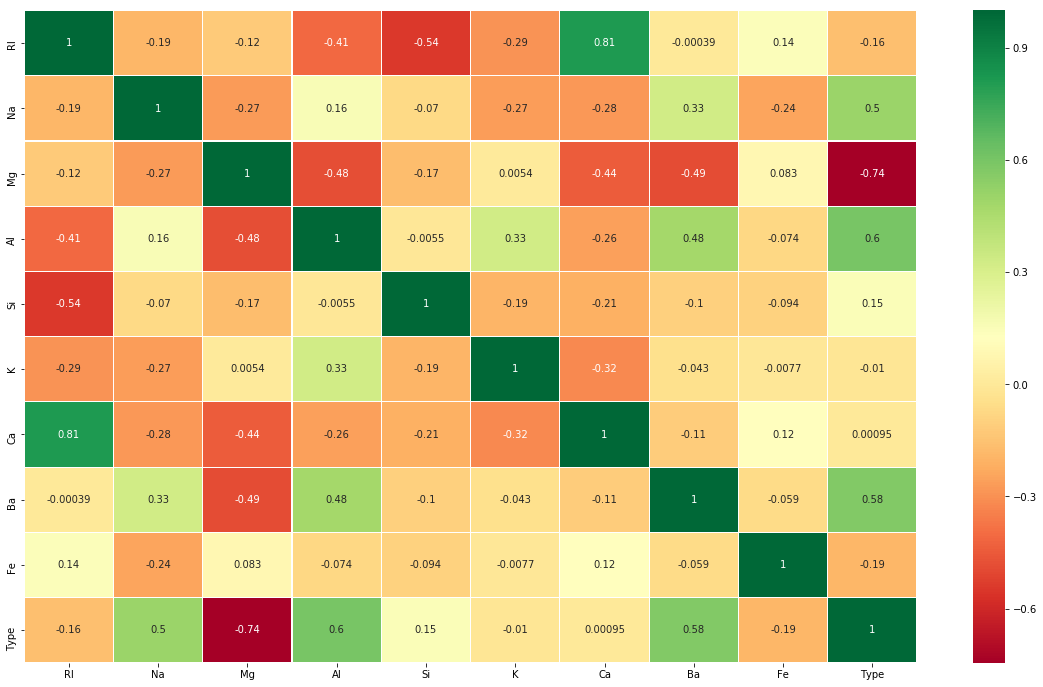

In [19]:
sns.heatmap(data_glass.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [20]:
#Так и есть, чем выше содержания в стекле кальция, тем выше коэф-т преломления. 
#Чем выше содержание силиконов, тем ниже преломление.
#А еще интересно, что есть корелляция между составом стекла и его типом. Это касается элементов натрий, магний, алюминий, барий.
#Видимо типы стекла имеют разное назначение. Исходя из назначения варьируется состав стекла.

In [23]:
#Хоче узнать, как будет присваиваться тип стекла в зависимости от состава
correlation_matrix = data_glass.corr(method ='pearson').round(2)

print(sorted(correlation_matrix['Type']))

[-0.74, -0.19, -0.16, -0.01, 0.0, 0.15, 0.5, 0.58, 0.6, 1.0]


In [24]:
#Возьмем только NA, MG, AI, BA.

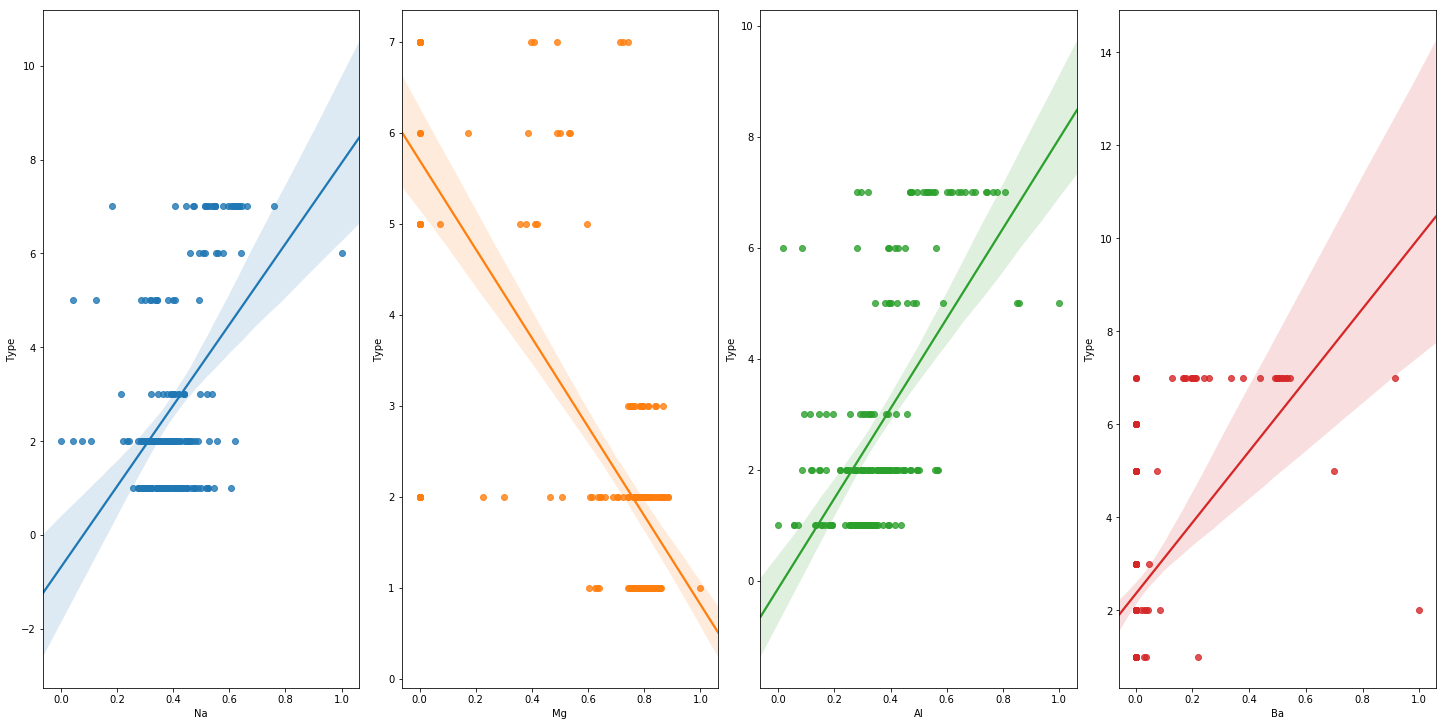

In [27]:
from sklearn import preprocessing
# нормализуем значения перед отрисовкой Type
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['Na', 'Mg', 'Al', 'Ba']
x = data_glass.loc[:,column_sels]
y = data_glass['Type']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [28]:
#И получилась как-то так себе. Зависимость типа стекла  от элементов есть, но она нелинейная. 
# Визуально получается, что чем больше натрия, алюминия и бария в стекле, тем выше тип. 
# Видимо больше натрия, алюминия и бария добавляют в стекло последних типов.
# А больше магния добавляют в стекла первых типов.

In [29]:
#Можно еще посмотреть зависимость преломления от  Si и  Ca.

In [31]:
print(sorted(correlation_matrix['RI']))

[-0.54, -0.41, -0.29, -0.19, -0.16, -0.12, -0.0, 0.14, 0.81, 1.0]


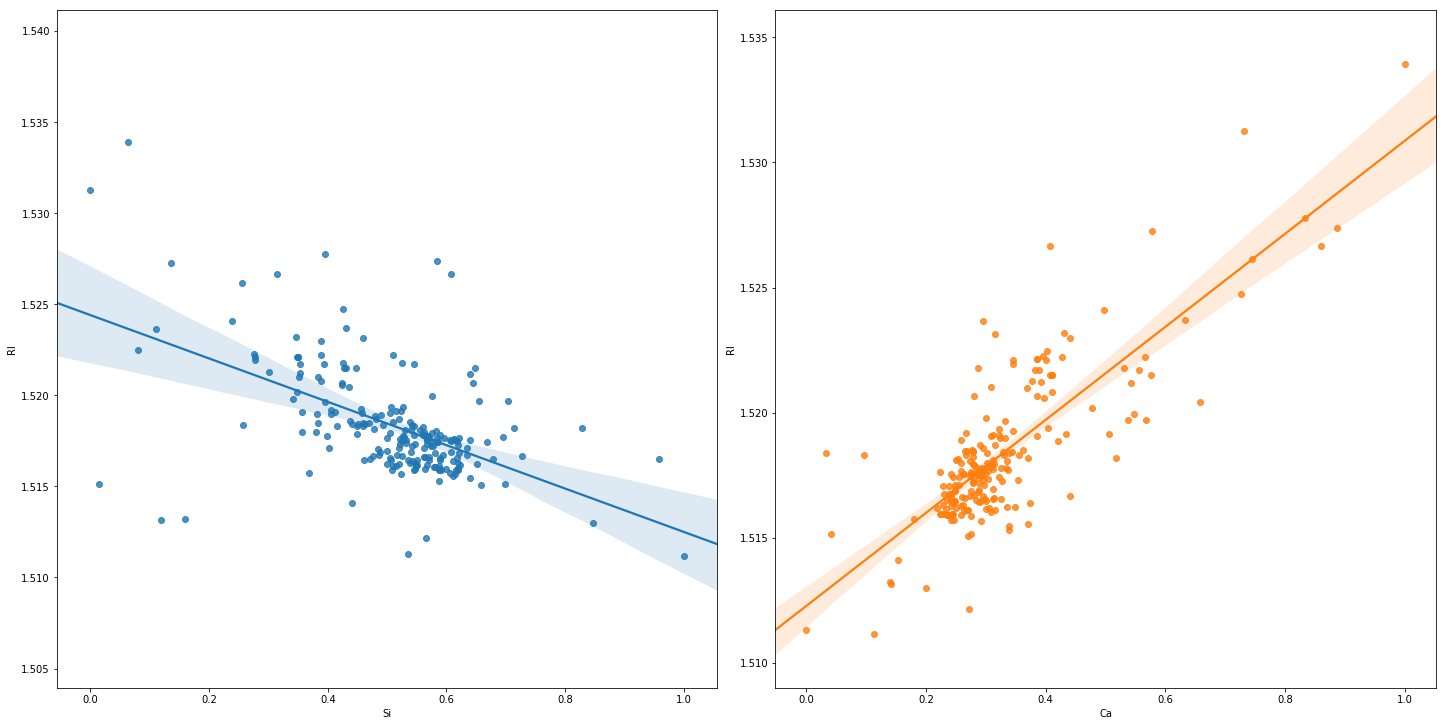

In [32]:
from sklearn import preprocessing
# нормализуем значения перед отрисовкой Type
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['Si', 'Ca']
x = data_glass.loc[:,column_sels]
y = data_glass['RI']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [33]:
#Вот тут явная линейная зависимость Ri от Ca. Чем больше кальция в составе, тем выше преломление. 
#В принципе обратная зависимость преломления от силиконов тоже есть, но есть выбросы.